In [2]:
# Import navis 
import navis

# Load one of the example neurons
sk = navis.example_neurons(n=1, kind='skeleton')

# Inspect the neuron
sk

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,4465
n_connectors,2705
n_branches,599
n_leafs,618
cable_length,266476.875
soma,[4177]
units,8 nanometer


In [2]:
sk.nodes.head()

,node_id,label,x,y,z,radius,parent_id,type
0,1,0,15784.0,37250.0,28062.0,10.000000,-1,root
1,2,0,15764.0,37230.0,28082.0,18.284300,1,slab
2,3,0,15744.0,37190.0,28122.0,34.721401,2,slab
3,4,0,15744.0,37150.0,28202.0,34.721401,3,slab
4,5,0,15704.0,37130.0,28242.0,34.721401,4,slab


In [3]:
m = navis.example_neurons(n=1, kind='mesh')
m

,
type,navis.MeshNeuron
name,DA1_lPN_R
id,1734350788
units,8 nanometer
n_vertices,6309
n_faces,13054


In [4]:
m.vertices, m.faces

(TrackedArray([[16384.        , 34792.03125   , 24951.88085938],
               [16384.        , 36872.0625    , 25847.89453125],
               [16384.        , 36872.0625    , 25863.89453125],
               ...,
               [ 5328.08105469, 21400.07617188, 16039.99414062],
               [ 6872.10498047, 19560.04882812, 13903.96191406],
               [ 6872.10498047, 19488.046875  , 13927.96191406]]),
 TrackedArray([[3888, 3890, 3887],
               [3890, 1508, 3887],
               [1106, 1104, 1105],
               ...,
               [5394, 5426, 5548],
               [5852, 5926, 6017],
               [ 207,  217,  211]]))

In [4]:
# Turn our above skeleton into dotprops
dp = navis.make_dotprops(sk, k=5)

dp

,
type,navis.Dotprops
name,DA1_lPN_R
id,1734350788
k,5
units,8 nanometer
n_points,4465


In [6]:
dp.points, dp.vect

(array([[15784., 37250., 28062.],
        [15764., 37230., 28082.],
        [15744., 37190., 28122.],
        ...,
        [14544., 36430., 28422.],
        [14944., 36510., 28282.],
        [15264., 36870., 28282.]], dtype=float32),
 array([[-0.3002053 , -0.39364937,  0.8688596 ],
        [-0.10845336, -0.2113751 ,  0.9713694 ],
        [-0.0435693 , -0.45593134,  0.8889479 ],
        ...,
        [-0.38446087,  0.44485292, -0.80888546],
        [-0.9457323 , -0.1827982 , -0.26865458],
        [-0.79947734, -0.5164282 , -0.30681902]], dtype=float32))

In [5]:
# Load an example mesh
m = navis.example_neurons(n=1, kind='mesh')

# Voxelize:
# - with a 0.5 micron voxel size
# - some Gaussian smoothing 
# - use number of vertices (counts) for voxel values
vx = navis.voxelize(m, pitch='0.5 microns', smooth=2, counts=True) 

vx

,
type,navis.VoxelNeuron
name,DA1_lPN_R
id,1734350788
units,500.0 nanometer
shape,"(298, 392, 286)"
dtype,float32


In [8]:
# The grid representation of the neuron
vx.grid.shape

(297, 392, 286)

In [9]:
# The (N, 3) voxel + (N, ) values representation of the neuron
# -> this is the sparse representation of the neuron
vx.voxels.shape, vx.values.shape

((641384, 3), (641384,))

In [3]:
n = navis.example_neurons(1)
n.connectors.head()

,connector_id,node_id,type,x,y,z,roi,confidence
0,0,1436,pre,6444,21608,14516,LH(R),0.959
1,1,1436,pre,6457,21634,14474,LH(R),0.997
2,2,2638,pre,4728,23538,14179,LH(R),0.886
3,3,1441,pre,5296,22059,16048,LH(R),0.967
4,4,1872,pre,4838,23114,15146,LH(R),0.990


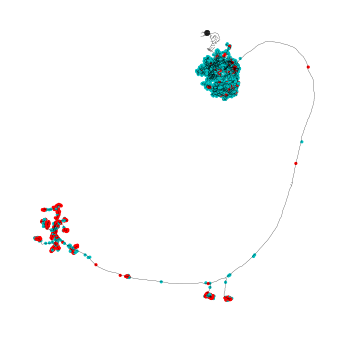

In [23]:
# Plot neuron including its connectors
# Note we're increasing connector size and decreasing line width
# to illustrate emphasize connectors
fig, ax = navis.plot2d(n, connectors=True, color='k', cn_size=10, lw=.25)
ax.dist = 5

In [24]:
n = navis.example_neurons(1)
n.soma

array([4177], dtype=int32)

In [25]:
n.soma_pos

array([[14957.1, 36540.7, 28432.4]], dtype=float32)

In [29]:
m = navis.example_neurons(1, kind='mesh')
m.soma_pos

[14957.1, 36540.7, 28432.4]

In [32]:
# Set the skeleton's soma on node with ID 1
n.soma = 1
n.soma

1

In [33]:
# Drop soma from MeshNeuron 
m.soma_pos = None

In [6]:
# Grab three example TreeNeurons
nl = navis.example_neurons(n=3)
nl

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer
2,navis.TreeNeuron,DA1_lPN_R,722817260,4332,3136,633,656,274703.37500,None,8 nanometer


In [7]:
# Get the first neuron in the list
nl[0]

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,4465
n_connectors,2705
n_branches,599
n_leafs,618
cable_length,266476.875
soma,[4177]
units,8 nanometer


In [12]:
# Get the number of nodes in the first skeleton
nl[0].n_nodes

4465

In [13]:
# Use the neuronlist to collect number of nodes across all neurons
nl.n_nodes

array([4465, 4847, 4332])

In [14]:
# Works on any neuron attribute
nl.cable_length

array([266476.88, 304332.66, 274703.38], dtype=float32)

```python
sk.reroot(sk.soma, inplace=True)
navis.reroot_skeleton(sk, sk.soma, inplace=True)
```

```python
sk.plot3d(color='red')
navis.plot3d(sk, color='red')
```

```python
lh = navis.example_volume('LH')
sk.prune_by_volume(lh, inplace=True)
navis.in_volume(sk, lh, inplace=True)
```

In [18]:
# Load a neuron
n = navis.example_neurons(1)
# Load an example neuropil
lh = navis.example_volume('LH')

# Prune neuron to neurpil but leave original intact
n_lh = n.prune_by_volume(lh, inplace=False)

print(f'{n.n_nodes} nodes before and {n_lh.n_nodes} nodes after pruning')

4465 nodes before and 344 nodes after pruning


In [8]:
nl = navis.example_neurons(n=3)

nl[[0, 2]]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R,1734350788,4465,2705,599,618,266476.875,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R,722817260,4332,3136,633,656,274703.375,None,8 nanometer


In [9]:
nl[:2]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer


In [10]:
subset = nl[nl.n_branches > 700]
subset

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer


In [22]:
nl.soma

array([array([4177], dtype=int32), array([6], dtype=int32), None],
      dtype=object)

In [23]:
nl.soma != None

array([ True,  True, False])

In [11]:
subset = nl[nl.soma != None]
subset

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer


In [14]:
for i, n in enumerate(nl):
    n.name = n.name + str(i + 1)
nl

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R1,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R2,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer
2,navis.TreeNeuron,DA1_lPN_R3,722817260,4332,3136,633,656,274703.37500,None,8 nanometer


In [15]:
nl['DA1_lPN_R1']

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R1,1734350788,4465,2705,599,618,266476.875,[4177],8 nanometer


In [16]:
nl[['DA1_lPN_R1', 'DA1_lPN_R2']]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R1,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R2,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer


In [17]:
nl['.*DA1.*']

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R1,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R2,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer
2,navis.TreeNeuron,DA1_lPN_R3,722817260,4332,3136,633,656,274703.37500,None,8 nanometer


In [18]:
nl[0].id

1734350788

In [19]:
nl.idx[1734350908]

,
type,navis.TreeNeuron
name,DA1_lPN_R2
id,1734350908
n_nodes,4847
n_connectors,3042
n_branches,735
n_leafs,761
cable_length,304332.65625
soma,[6]
units,8 nanometer


In [32]:
[1] + [3]

[1, 3]

In [20]:
nl[:2] + nl[2:]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R1,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R2,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer
2,navis.TreeNeuron,DA1_lPN_R3,722817260,4332,3136,633,656,274703.37500,None,8 nanometer


In [21]:
nl[0] + nl[1]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R1,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R2,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer


In [35]:
l = [1, 2, 3]
l.pop(2)
l

[1, 2]

In [22]:
nl - nl[2]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R1,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,DA1_lPN_R2,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer


In [37]:
set([0, 1, 2]) &  set([2, 3, 4])

{2}

In [23]:
nl[[0, 1]] & nl[[1, 2]]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,DA1_lPN_R2,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer


In [39]:
n = nl[0]
n.nodes.head()

,node_id,label,x,y,z,radius,parent_id,type
0,1,0,15784.0,37250.0,28062.0,10.000000,-1,root
1,2,0,15764.0,37230.0,28082.0,18.284300,1,slab
2,3,0,15744.0,37190.0,28122.0,34.721401,2,slab
3,4,0,15744.0,37150.0,28202.0,34.721401,3,slab
4,5,0,15704.0,37130.0,28242.0,34.721401,4,slab


In [41]:
n2 = n / 1000
n2.nodes.head()

,node_id,label,x,y,z,radius,parent_id,type
0,1,0,15.784,37.250000,28.062000,0.010000,-1,root
1,2,0,15.764,37.230000,28.082001,0.018284,1,slab
2,3,0,15.744,37.189999,28.122000,0.034721,2,slab
3,4,0,15.744,37.150002,28.202000,0.034721,3,slab
4,5,0,15.704,37.130001,28.242001,0.034721,4,slab


In [42]:
print('Before:', n.units)
print('After:', n2.units)

Before: 8 nanometer
After: 8.0 micrometer


In [17]:
1 == 1

True

In [18]:
2 == 1

False

In [5]:
nl[0] == nl[0]

True

In [6]:
nl[0] == nl[1]

False

In [21]:
navis.TreeNeuron.EQ_ATTRIBUTES

['n_nodes',
 'n_connectors',
 'soma',
 'root',
 'n_branches',
 'n_leafs',
 'cable_length',
 'name']

In [7]:
nl == nl

True

In [4]:
nl == nl[:2]

False

In [5]:
nl == nl[[2, 1, 0]]

False

In [6]:
nl[0] == nl[0].copy()

True

In [7]:
nl[0] == nl[0].downsample(2, inplace=False)

False

In [8]:
nl[0] in nl

True

In [9]:
nl[0] in nl[1:]

False

In [37]:
n = navis.example_neurons(1, kind='skeleton')

print(f'Nodes in node table: {n.nodes.shape[0]}')
print(f'Nodes in graph: {len(n.graph.nodes)}')

Nodes in node table: 4465
Nodes in graph: 4465


In [38]:
n.prune_by_strahler(1, inplace=True)

print(f'Nodes in node table: {n.nodes.shape[0]}')
print(f'Nodes in graph: {len(n.graph.nodes)}')

Nodes in node table: 1770
Nodes in graph: 1770


In [4]:
n = navis.example_neurons(1)

print(f'Nodes in node table before: {n.nodes.shape[0]}')
print(f'Nodes in graph before: {len(n.graph.nodes)}')

# Truncate the node table by 55 nodes
n.nodes = n.nodes.iloc[:-55]

print(f'\nNodes in node table after: {n.nodes.shape[0]}')
print(f'Nodes in graph after: {len(n.graph.nodes)}')

Nodes in node table before: 4465
Nodes in graph before: 4465

Nodes in node table after: 4410
Nodes in graph after: 4410


In [5]:
# Clear temporary attributes of the neuron
n._clear_temp_attr()

In [14]:
# Start with a mesh neuron
m = navis.example_neurons(1, kind='mesh')

# Skeletonize the mesh
s = navis.skeletonize(m)

# Make dotprops (this works from any other neuron type
dp = navis.make_dotprops(s, k=5)

# Voxelize the mesh
vx = navis.voxelize(m, pitch='2 microns', smooth=1, counts=True)

# Mesh the voxels 
mm = navis.mesh(vx.threshold(.5))

In [ ]:
# Co-visualize the mesh and the skeleton
fig = navis.plot3d([m, s], color=[(1, 1, 1, .2), 'r'])

In [ ]:
# Co-visualize the mesh and the dotprops
fig = navis.plot3d([m, dp], color=[(1, 1, 1, .2), 'r'])

In [ ]:
# Co-visualize the mesh and the dotprops
# (note that plotly is not great at visualizing voxels)
fig = navis.plot3d([m * 8, vx])

In [ ]:
# Co-visualize the original mesh and the meshed voxels
fig = navis.plot3d([vx, mm])